In [2]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
from datetime import datetime

# Display network
## Austin Larson

### Load network
This dataset is stored in two separate files. One tsv shows all hyperlinks in title, while the other has in body of message. I (for now) only use the title file, which should have a more correlated relationship. All information on the data can be found at the following website:
https://snap.stanford.edu/data/soc-RedditHyperlinks.html

The data is too large to visualize, so I will reduce it to just a single year (2014). I also simplified it by guaranteeing cutting out the useless data.

In [30]:
title = pd.read_csv(r'C:\Users\austi\Downloads\soc-redditHyperlinks-title.tsv', sep='\t')
title['TIMESTAMP'] = pd.to_datetime(title['TIMESTAMP'], infer_datetime_format=True)
title = title.drop(labels=['POST_ID', 'PROPERTIES'], axis=1)
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571927 entries, 0 to 571926
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SOURCE_SUBREDDIT  571927 non-null  object        
 1   TARGET_SUBREDDIT  571927 non-null  object        
 2   TIMESTAMP         571927 non-null  datetime64[ns]
 3   LINK_SENTIMENT    571927 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 17.5+ MB


In [32]:
title['year'] = pd.DatetimeIndex(title['TIMESTAMP']).year
title['month'] = pd.DatetimeIndex(title['TIMESTAMP']).month
title = title[(title['year'] == 2014) & (title['month'] == 1)]
title = title.drop(['TIMESTAMP', 'year', 'month'], axis=1)
title.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9315 entries, 7 to 338046
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SOURCE_SUBREDDIT  9315 non-null   object
 1   TARGET_SUBREDDIT  9315 non-null   object
 2   LINK_SENTIMENT    9315 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 291.1+ KB


In [33]:
g = nx.convert_matrix.from_pandas_edgelist(
    df = title, 
    source = "SOURCE_SUBREDDIT", 
    target = "TARGET_SUBREDDIT",
    edge_attr = "LINK_SENTIMENT",
    create_using=nx.DiGraph
)
nodelist = list(g.nodes)
A = nx.to_numpy_array(g, nodelist)

### Display network
#### Heatmap
I run into issues using heatmaps, since this is a rather large dataset, so I cannot glean much information as a heatmap. However, since I assume you would like to see one, here's a sample.

<AxesSubplot:>

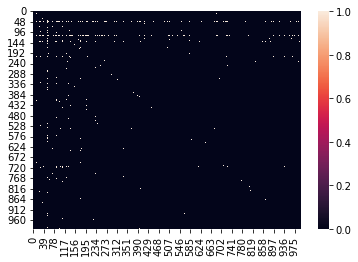

In [35]:
sns.heatmap(A[:1000, :1000])

#### Node display
Using a display made in NetworkX, I can hopefully see something a little more clear.

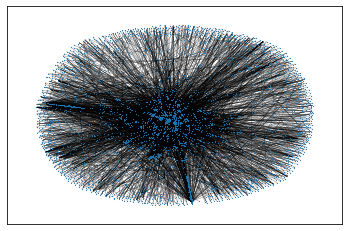

In [41]:
nx.draw_networkx(g, with_labels=False, node_size=1, arrows=False, width=0.2, linewidths=0.2)

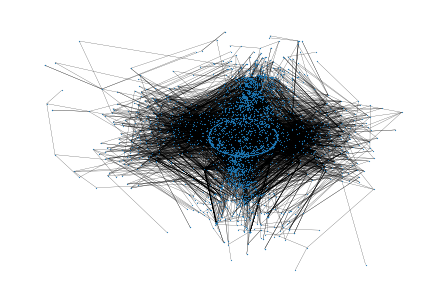

In [42]:
nx.draw_kamada_kawai(g, with_labels=False, node_size=1, arrows=False, width=0.2, linewidths=0.2)